In [3]:
import numpy as np   
import statsmodels.api as sm
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations
from math import factorial

plt.style.use('ggplot')

In [83]:
fifa_df = pd.read_csv("fifadata.csv")

In [60]:
print(fifa_df.head(10))

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   
5           5  183277          E. Hazard   27   
6           6  177003          L. Modrić   32   
7           7  176580          L. Suárez   31   
8           8  155862       Sergio Ramos   32   
9           9  200389           J. Oblak   25   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5  https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6  ht

In [61]:
print(fifa_df.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [110]:
features = ['Acceleration','SprintSpeed','Agility', 'Stamina','Strength', 'Height', 'Finishing']
target = 'Value'

In [84]:
'''
Helper Functions to clean the data:
'''
def height_to_inches(h):
  if type(h) is str:
    hsplit = h.split("'")   # splits a string like 5'7 and returns the total inches
    feet = int(hsplit[0])
    inches = int(hsplit[1])
    return feet*12 + inches
  else:
    return h

def clean_weight(w):
  if type(w) is str:
    wnew = int(w.replace("lbs",""))
    return wnew
  else:
    return w

def clean_price(c):
  if type(c) is str:
    ismillion = False
    if "M" in c:
      ismillion = True
    cnew = float(c.replace("€", "").replace("M", "").replace("K", ""))
    if ismillion:
      cnew *= 1000
    return cnew
  else:
    return c

# Actually clean up the dataset:

all_cols = [i for i in features]
all_cols.append(target)
cols_to_keep = [not i for i in fifa_df[all_cols].isna().any(axis=1)]
fifa_df = fifa_df[cols_to_keep]

print(fifa_df['Height'])
fifa_df['Height'] = fifa_df['Height'].apply(height_to_inches)
fifa_df['Height'].astype('int')
print(fifa_df['Height'])

print(fifa_df['Weight'])
fifa_df['Weight'] = fifa_df['Weight'].apply(clean_weight)
fifa_df['Weight'].astype('int')
print(fifa_df['Weight'])

# Ive commented these out as per the description from the code where we set
# the features above
'''
print(fifa_df['Value'])
fifa_df['Value'] = fifa_df['Value'].apply(clean_price)
fifa_df['Value'].astype('int')
print(fifa_df['Value'])

print(fifa_df['Release Clause'])
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(clean_price)
fifa_df['Release Clause'].astype('int')
print(fifa_df['Release Clause'])
'''

# Applying cleanup to the target as well
print(fifa_df['Value'])
fifa_df['Value'] = fifa_df['Value'].apply(clean_price)
fifa_df['Value'].astype('int')
print(fifa_df['Value'])

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18159, dtype: object
0        67
1        74
2        69
3        76
4        71
         ..
18202    69
18203    75
18204    68
18205    70
18206    70
Name: Height, Length: 18159, dtype: int64
0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18159, dtype: object
0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18159, dtype: int64
0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18159, dtype: obj

In [97]:
X = fifa_df[features]
Y = fifa_df[target]

In [24]:
X = fifa_df['SprintSpeed']

In [98]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.893
Date:                Sun, 23 Feb 2020   Prob (F-statistic):             0.0958
Time:                        13:04:50   Log-Likelihood:                -689.58
No. Observations:                  70   AIC:                             1393.
Df Residuals:                      63   BIC:                             1409.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6085.2851   3.57e+04      0.170   

Residuals: 
381      14050.874963
479      11259.419680
518       9956.816079
560      11678.054731
561      10666.122340
             ...     
15265     -940.040703
15783    -3056.438040
16379    -5093.090474
16963    -1893.122437
17735    -1449.686212
Length: 70, dtype: float64




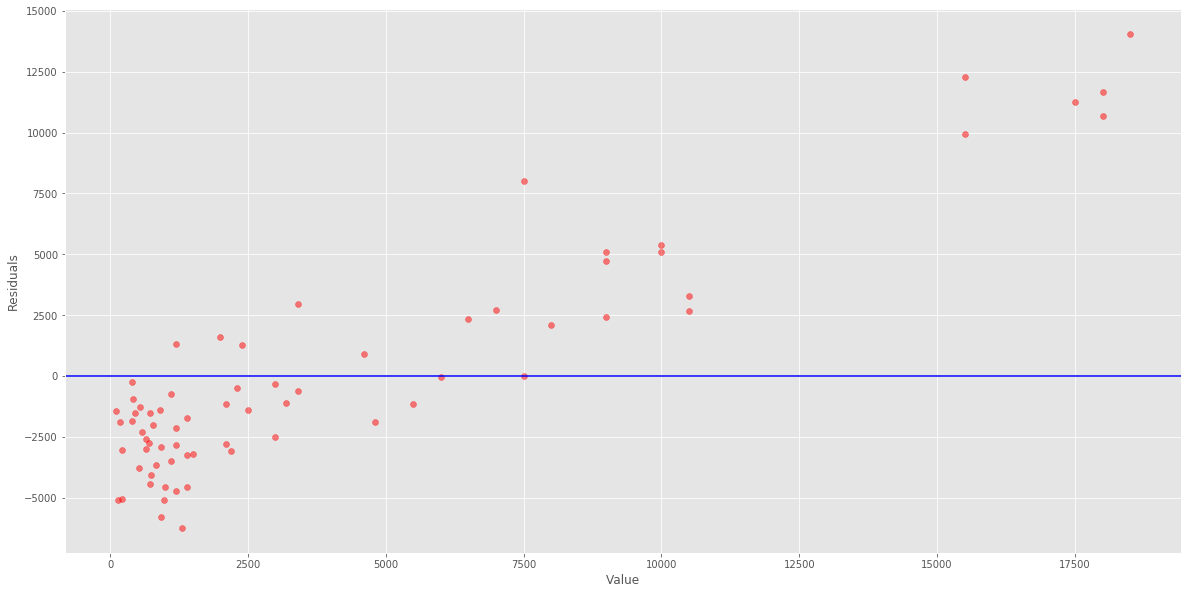

In [101]:
residuals = results.resid
print('Residuals: \n' + str(residuals) + '\n\n')

fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(fifa_df['Value'], residuals, color='red', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Residuals')
plt.axhline(y=0, color='b', linestyle='-')

In [ ]:
#Code Block, what variable could sprint speed predict?

In [112]:
X = fifa_df[features]
Y = fifa_df[target]

In [113]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     33.06
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           5.33e-17
Time:                        13:09:15   Log-Likelihood:                -546.88
No. Observations:                  60   AIC:                             1110.
Df Residuals:                      52   BIC:                             1127.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.625e+04   1.96e+04     -4.905   

Residuals: 
381      2927.750044
479      5165.060958
518      3207.857518
560      6746.526598
561      4431.616653
653       352.178828
1022      744.901246
1216     -120.521120
1226    -1552.925405
1237     1322.987841
1347      213.285640
1386      -89.598507
1404     -650.867056
1507    -3539.267842
2023    -2273.140152
2029     -398.292083
2253    -1291.797901
2508     -793.342945
2936      389.599994
3210    -3046.820430
3231      817.724377
3388     1057.389143
3468     -276.940398
3586     2490.556440
3665    -1445.007706
4436     -257.432704
4519    -3109.352470
4970       -8.456744
5171    -2435.955772
5418    -1155.724081
5513     2492.241562
5523    -3712.591553
5598     -131.167195
5653    -2831.825866
5853    -3568.912205
5879    -1336.329920
6033    -3136.246270
6143    -2303.489850
6272    -1157.855342
6334    -3470.520876
6483       46.126115
7204     1309.549619
7371    -1077.922869
7546    -1620.469318
7598    -1026.996267
8215     1626.753480
8452      479.592763
8

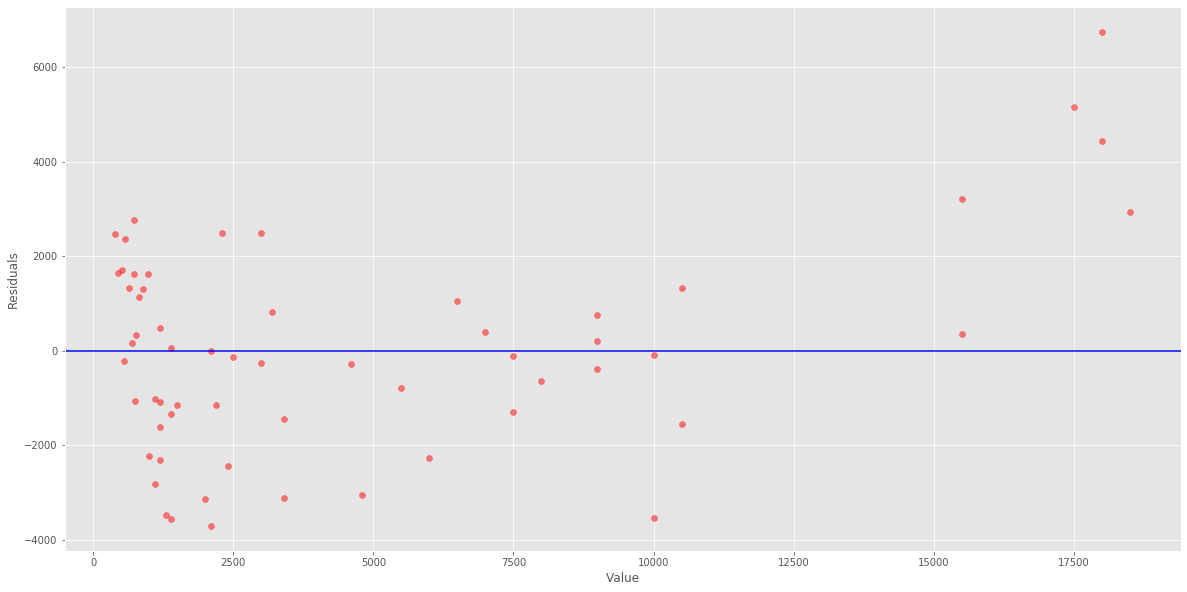

In [124]:
residuals = results.resid
print('Residuals: \n' + str(residuals) + '\n\n')
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(fifa_df['Value'], residuals, color='red', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Residuals')
plt.axhline(y=0, color='b', linestyle='-')

In [125]:
residuals = pd.DataFrame(data = residuals)
residuals = residuals[residuals < -2000]

In [138]:
m = residuals.dropna()

In [90]:
fifa_df['Value']

87       45000.0
124      42000.0
193      30500.0
268      26000.0
381      18500.0
          ...   
15265      425.0
15783      210.0
16379      150.0
16963      180.0
17735      100.0
Name: Value, Length: 75, dtype: float64

In [111]:
fifa_df = fifa_df[fifa_df['SprintSpeed'] > 80]
fifa_df = fifa_df[fifa_df['Acceleration'] > 80]
fifa_df = fifa_df[fifa_df['Strength'] > 70]
fifa_df = fifa_df[fifa_df['Value'] < 50000]
fifa_df = fifa_df[fifa_df['Finishing'] > 60]

In [79]:
fifa_df = fifa_df[fifa_df.Position.dropna()]

In [86]:
fifa_df = fifa_df[fifa_df['Position'].str.contains('ST', na = False)]

In [150]:
fifa_df[fifa_df['Unnamed: 0'] == 5853]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5853,5853,229949,Anderson Lopes,24,https://cdn.sofifa.org/players/4/19/229949.png,Brazil,https://cdn.sofifa.org/flags/54.png,69,74,FC Seoul,...,65.0,33.0,25.0,19.0,6.0,11.0,14.0,12.0,6.0,€1.9M


In [148]:
m = pd.DataFrame(m)
m[0]

1507   -3539.267842
2023   -2273.140152
3210   -3046.820430
4519   -3109.352470
5171   -2435.955772
5523   -3712.591553
5653   -2831.825866
5853   -3568.912205
6033   -3136.246270
6143   -2303.489850
6334   -3470.520876
8648   -2227.125438
Name: 0, dtype: float64